# Lab 4: Fourier series and PDEs

In this lab we will revisit topics from recent weeks in the course - computing Fourier series, and using these methods to solve partial differential equations such as the wave equation.

By using Python, we will be able to tackle some computations quickly, and also produce visualisations to help understand what is going on.

## 1. Fourier series

Recall that a periodic function $f(x)$ with period $2L$ can be expressed as the **Fourier series** $$\frac{a_0}{2}+\sum_{n=1}^\infty\left(a_n\cos\frac{n\pi x}{L}+b_n\sin\frac{n\pi x}{L}\right),$$
where $$\begin{align} a_n &=\frac{1}{L}\int_{-L}^{L}f(x)\cos\frac{n\pi x}{L}\,dx \\ b_n &=\frac{1}{L}\int_{-L}^{L}f(x)\sin\frac{n\pi x}{L}\,dx \end{align}$$

For many functions, we can use SymPy to do these computations.

---
**Example**

Find the Fourier series for the function with period 2, defined on $[-1,1)$ by: $$f(x) = \begin{cases}-1 & -1\leq x <0, \\ 1 & 0<x<1\end{cases}$$

---

First, we load SymPy and use its [`Piecewise`](https://docs.sympy.org/latest/modules/functions/elementary.html#piecewise) function to define $f$:

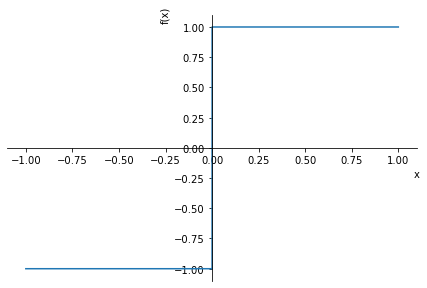

In [1]:
import sympy as sym
import sympy.plotting as sym_plot
sym.init_printing()
from IPython.display import display_latex

x,n = sym.symbols('x, n')

f = sym.Piecewise((1, (x>0)), (-1, (x<=0)))

sym_plot.plot(f, (x,-1,1))

<span class="label label-danger">Task</span>
Does the syntax for `sym.Piecewise` make sense to you? Read the details in the documentation (linked above) to help you. This will be important for defining piecewise functions yourself later in the lab!

We can use `SymPy` to compute the Fourier coefficients:

In [2]:
a0 = sym.integrate(f, (x,-1,1))
an = sym.integrate(f*sym.cos(n*sym.pi*x), (x, -1, 1))
bn = sym.integrate(f*sym.sin(n*sym.pi*x), (x, -1, 1))

In [3]:
a0

In [4]:
an

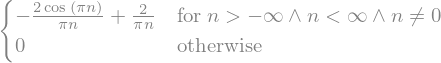

In [5]:
bn

Next, we can use a `Sum` to write the Fourier series -- here, we just take the terms up to $n=10$:

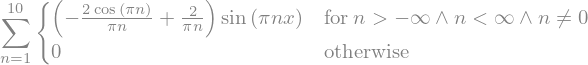

In [6]:
f10 = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x)+bn*sym.sin(n*sym.pi*x), (n,1,10))
f10

The `simplify()` function can help to gather common factors:

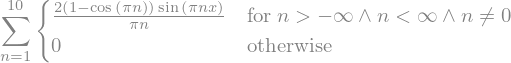

In [7]:
f10.simplify()

And to actually work with the expression, we can use `doit()` to make SymPy write out all the terms of the sum:

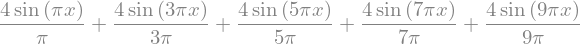

In [8]:
f10_expr = f10.doit()
f10_expr

We can then produce a plot of this Fourier approximation, and the original function:

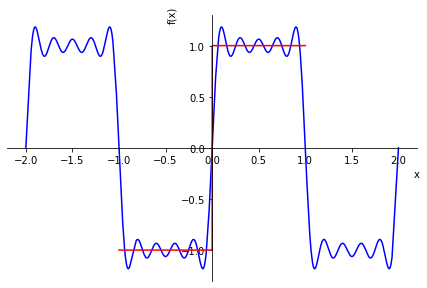

In [9]:
f_plot = sym_plot.plot((f10_expr,(x,-2,2)), (f,(x,-1,1)), show  = False)
f_plot[0].line_color = "blue"
f_plot[1].line_color = "red"
f_plot.show()

<span class="label label-danger">Task</span>
What happens if you try to plot `f10` directly, rather than `f10_expr`?

<div class="alert alert-info">
    <h3>Exercise 1.1 </h3>

Produce similar plots for:

**(a)** $g(x)=\exp(x)$ on $[-1,1]$

**(b)** $h(x)=x+2$ on $[-2,2]$

</div>

*Hint:* For (b) you will need to account for the $L$ appearing in the general Fourier series formulae.

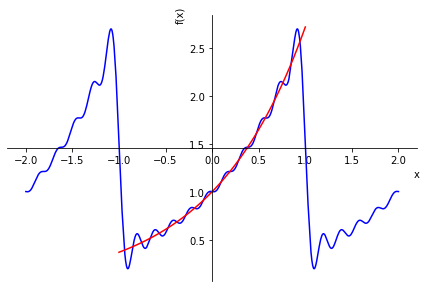

In [10]:
# Your code here for (a)

### BEGIN SOLUTION
g = sym.exp(x)

# Compute the Fourier series
a0 = sym.integrate(g, (x,-1,1))
an = sym.integrate(g*sym.cos(n*sym.pi*x), (x, -1, 1))
bn = sym.integrate(g*sym.sin(n*sym.pi*x), (x, -1, 1))
g_sum = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x)+bn*sym.sin(n*sym.pi*x), (n,1,10))
g_approx = g_sum.doit() #note - the doit() is needed, to simplify the expression

# Produce a plot of the original function and its approximation
g_plot = sym_plot.plot((g_approx,(x,-2,2)), (g,(x,-1,1)), show  = False)
g_plot[0].line_color = "blue"
g_plot[1].line_color = "red"
g_plot.show()
### END SOLUTION

In [11]:
# Autograder test for (a)

assert an.subs(n,2).simplify() == 2*sym.sinh(1)/(1 + 4*sym.pi**2)
print(" ✔ a_2 is correct")
assert bn.subs(n,3).simplify() == 6*sym.pi*sym.sinh(1)/(1 + 9*sym.pi**2)
print(" ✔ b_3 is correct")
assert isinstance(g_plot, type(f_plot))
print(" ✔ g_plot exists")
assert len(g_plot._series) > 1
print(" ✔ at least two curves are plotted (should be g and its approximation)")
# Hidden tests (1 mark)
### BEGIN HIDDEN TESTS
assert bn.subs(n,2).simplify() == -4*sym.pi*sym.sinh(1)/(1 + 4*sym.pi**2)
print(" ✔ b_2 is correct")
### END HIDDEN TESTS

 ✔ a_2 is correct
 ✔ b_3 is correct
 ✔ g_plot exists
 ✔ at least two curves are plotted (should be g and its approximation)
 ✔ b_2 is correct


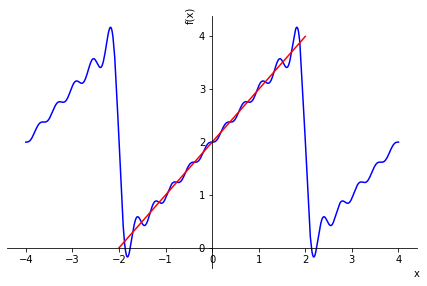

In [12]:
# Your code here for (b)

### BEGIN SOLUTION
h = x + 2

# Compute the Fourier series
a0 = sym.integrate(h, (x,-2,2))/2
an = sym.integrate(h*sym.cos(n*sym.pi*x/2), (x, -2, 2))/2
bn = sym.integrate(h*sym.sin(n*sym.pi*x/2), (x, -2, 2))/2
h_sum = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/2)+bn*sym.sin(n*sym.pi*x/2), (n,1,10))
h_approx = h_sum.doit() #note - the doit() is needed, to simplify the expression

# Produce a plot of the original function and its approximation
h_plot = sym_plot.plot((h_approx,(x,-4,4)), (h,(x,-2,2)), show  = False)
h_plot[0].line_color = "blue"
h_plot[1].line_color = "red"
h_plot.show()
### END SOLUTION

In [13]:
# Autograder test for (b)

assert an.subs(n,2).simplify() == 0
print(" ✔ a_2 is correct")
assert bn.subs(n,3).simplify() == 4/(3*sym.pi)
print(" ✔ b_3 is correct")
assert isinstance(h_plot, type(f_plot))
print(" ✔ h_plot exists")
assert len(h_plot._series) > 1
print(" ✔ at least two curves are plotted (should be h and its approximation)")
assert bn.subs(n,2).simplify() == -2/sym.pi
print(" ✔ b_2 is correct")


 ✔ a_2 is correct
 ✔ b_3 is correct
 ✔ h_plot exists
 ✔ at least two curves are plotted (should be h and its approximation)
 ✔ b_2 is correct


<div class="alert alert-info">
    <h3>Exercise 1.2 </h3>

**(a)** Write a function `approx_fourier` that takes in a SymPy expression `f`, and integers `L` and `num_terms`. It should return the Fourier series with `num_terms` terms, for the function with period 2`L` that matches `f` on $[-L,L]$.

So `approx_fourier(f, 1, 10)` should produce an expression like `f10_expr` that we computed above.

**(b)** Write another function, `plot_approx`, that takes the same arguments and produces a plot of `f` and its Fourier series (making use of the `approx_fourier` function you just wrote).

**(c)** Use the functions to replicate the plots you produced in Exercise 1.1.

**(d)** Similarly, produce plots of the Fourier series in Tutorial Week 7, Q2 (b) and (c).

</div>


In [14]:
# Your code here for (a)

def approx_fourier(f, L, num_terms):
    
    ### BEGIN SOLUTION
    a0 = sym.Rational(1,L)*sym.integrate(f, (x, -L, L))
    an = sym.Rational(1,L)*sym.integrate(f*sym.cos(n*sym.pi*x/L), (x, -L, L))
    bn = sym.Rational(1,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, -L, L))
    f_approx = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/L)+bn*sym.sin(n*sym.pi*x/L), (n,1,num_terms))
    return f_approx.doit()
    ### END SOLUTION

In [15]:
# Autograder test 
def check_solution(student_answer, expected_answer, message):
    print("Testing "+message)
    # Check the constants
    const = list(student_answer.atoms(sym.Symbol))
    assert x in const
    assert len(const) == 1
    print(" ✔ output contains the correct number of symbols")
    assert isinstance(student_answer,type(expected_answer))
    print(" ✔ output is of the correct type")
    # Does the answer match the model answer?
    assert student_answer - expected_answer == 0 
    print(" ✔ general solution matches model answer \n")

check_solution(approx_fourier(f, 1, 10), f10_expr, "f10_expr example")

Testing f10_expr example
 ✔ output contains the correct number of symbols
 ✔ output is of the correct type
 ✔ general solution matches model answer 



In [16]:
# Autograder Test: check approx_fourier on g(x) (0.5 marks)
### BEGIN HIDDEN TESTS
#This is a repeat of the model answer, for comparison
def af_solution(f, L, num_terms):
    a0 = sym.Rational(1,L)*sym.integrate(f, (x, -L, L))
    an = sym.Rational(1,L)*sym.integrate(f*sym.cos(n*sym.pi*x/L), (x, -L, L))
    bn = sym.Rational(1,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, -L, L))
    f_approx = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/L)+bn*sym.sin(n*sym.pi*x/L), (n,1,num_terms))
    return f_approx.doit()

g_sol = sym.exp(x)
check_solution(approx_fourier(g_sol, 1, 10), af_solution(g_sol, 1, 10), "approx_fourier for g(x)")
### END HIDDEN TESTS

Testing approx_fourier for g(x)
 ✔ output contains the correct number of symbols
 ✔ output is of the correct type
 ✔ general solution matches model answer 



In [17]:
# Autograder Test: check approx_fourier on h(x) (0.5 marks)
### BEGIN HIDDEN TESTS
h_sol = x+2
check_solution(approx_fourier(h_sol, 2, 10), af_solution(h_sol, 2, 10), "approx_fourier for h(x)")
### END HIDDEN TESTS

Testing approx_fourier for h(x)
 ✔ output contains the correct number of symbols
 ✔ output is of the correct type
 ✔ general solution matches model answer 



In [18]:
# Your code here for (b) 

def plot_approx(f, L, num_terms):
    
    ### BEGIN SOLUTION
    f_approx = approx_fourier(f, L, num_terms)
    f_plot = sym_plot.plot((f_approx,(x,-2*L,2*L)), (f,(x,-L,L)), show  = False)
    f_plot[0].line_color = "blue"
    f_plot[1].line_color = "red"
    return f_plot
    ### END SOLUTION

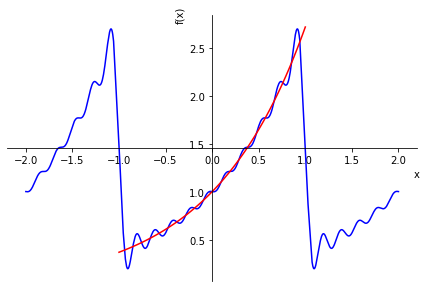

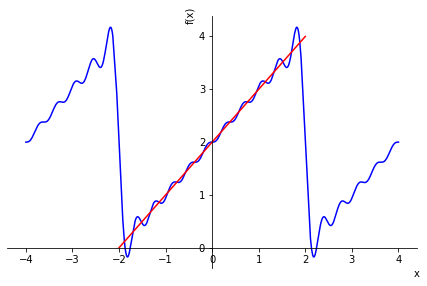

In [19]:
# Your code here for (c) 

### BEGIN SOLUTION
plot_approx(g, 1, 10).show()
plot_approx(h, 2, 10).show()
### END SOLUTION

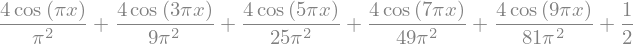

In [20]:
# Your code here for (d) - The Fourier series of the function in Workshop Week 7, Q2 (b) 
# Use the name g_b for the function

### BEGIN SOLUTION
g_b = sym.Piecewise((1-x, (x>0)), (x+1, (x<=0)))
display_latex(g_b)

approx_fourier(g_b, 1, 10)
### END SOLUTION

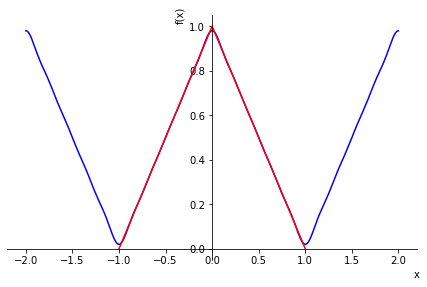

In [21]:
# Your code here for (d) - The plot of the function in Workshop Week 7, Q2 (b) 

### BEGIN SOLUTION
plot_approx(g_b, 1, 10).show()
### END SOLUTION

In [22]:
# Autograder Test: The Fourier series of the function in Workshop Week 7, Q2 (b)

assert isinstance(g_b, sym.Piecewise)
print(" ✔ g_b definition is of the correct type")
assert [g_b.subs(x,xi/4) for xi in range(-4,4,1)] == [0, 0.25, 0.5, 0.75, 1.0, 0.75, 0.5, 0.25]
print(" ✔ g_b takes correct values")

# Hidden tests (0.5 marks)
### BEGIN HIDDEN TESTS
g_b_sol = sym.Piecewise((1-x, (x>0)), (x+1, (x<=0)))
check_solution(approx_fourier(g_b, 1, 10), af_solution(g_b_sol, 1, 10), "Workshop Week 7, Q2 (b)")
### END HIDDEN TESTS

 ✔ g_b definition is of the correct type
 ✔ g_b takes correct values
Testing Workshop Week 7, Q2 (b)
 ✔ output contains the correct number of symbols
 ✔ output is of the correct type
 ✔ general solution matches model answer 



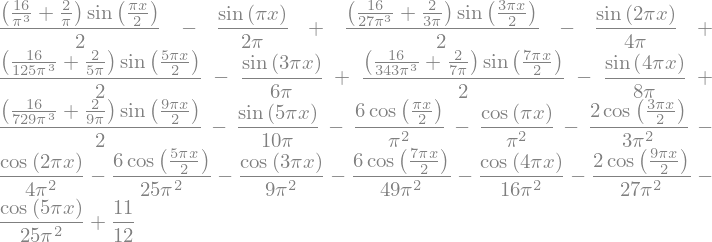

In [23]:
# Your code here for (d) - The Fourier series of the function in Workshop Week 7, Q2 (c) 

### BEGIN SOLUTION
g_c = sym.Piecewise((2*x-x**2/2, x>=0), (-x/2, x<0))
display_latex(g_c)

approx_fourier(g_c, 2, 10)
### END SOLUTION

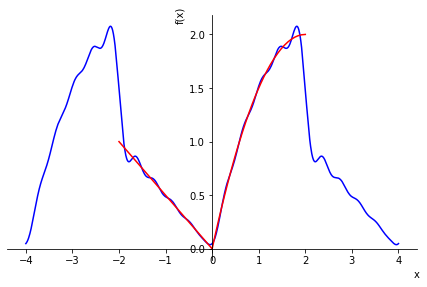

In [24]:
# Your code here for (d) - The plot of the function in Workshop Week 7, Q2 (c) 

### BEGIN SOLUTION
plot_approx(g_c, 2, 10).show()
### END SOLUTION

In [25]:
# Autograder Test: The Fourier series of the function in Workshop Week 7, Q2 (c)
assert isinstance(g_c, sym.Piecewise)
print(" ✔ g_c definition is of the correct type")
assert [g_c.subs(x,xi/2) for xi in range(-4,4,1)] == [1.0, 0.75, 0.5, 0.25, 0, 0.875, 1.5, 1.875]
print(" ✔ g_c takes correct values")

# Hidden tests (0.5 marks)
### BEGIN HIDDEN TESTS
g_c_sol = sym.Piecewise((2*x-x**2/2, x>=0), (-x/2, x<0))
check_solution(approx_fourier(g_c, 1, 10), af_solution(g_c_sol, 1, 10), "Workshop Week 7, Q2 (c)")
### END HIDDEN TESTS

 ✔ g_c definition is of the correct type
 ✔ g_c takes correct values
Testing Workshop Week 7, Q2 (c)
 ✔ output contains the correct number of symbols
 ✔ output is of the correct type
 ✔ general solution matches model answer 



### Gibbs phenomenon

<span class="label label-danger">Task</span>
Use your `plot_approx` function to plot the approximations of $f$ by Fourier series with 10, 20 and 30 terms.

You should notice the approximations overshoot the values of +1 and -1 at the discontinuities, and increasing the number of terms does not seem to make this better. This is the Gibbs phenomenon.

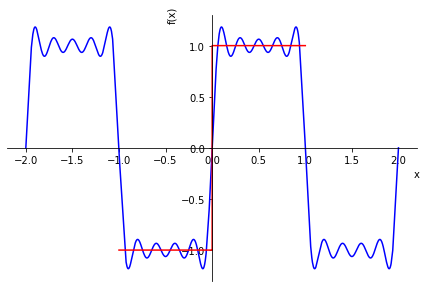

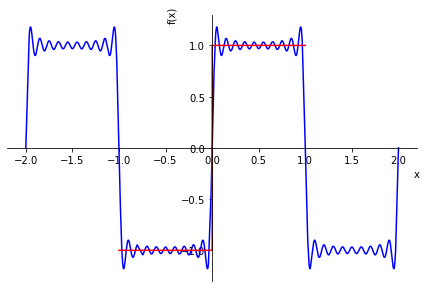

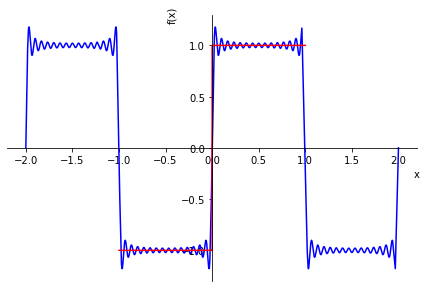

In [26]:
# Your code here 

### BEGIN SOLUTION
plot_approx(f, 1, 10).show()
plot_approx(f, 1, 20).show()
plot_approx(f, 1, 30).show()
### END SOLUTION

## 2. Animating plots in Python

To get a visual sense of how the Fourier series converges toward the function it is approximating, we can produce an animation which shows the effect of adding more terms. Each frame in the animation will add a new term to the Fourier series, and we would expect to see the Fourier series looking more and more like the function it is approximating.

To achieve this in Python, we will use the [`matplotlib.animation`](https://matplotlib.org/3.1.1/api/animation_api.html) functionality. This works a bit like a [flip book](https://en.wikipedia.org/wiki/Flip_book), where we need to write a function that draws each "frame" of the animation and `matplotlib` will stitch them all together to make an animation.

### From SymPy to NumPy
The first problem we have is that so far we have been working with SymPy, but `matplotlib` works with NumPy. Fortunately, there is a way round this.

Here is a piece of code from earlier, which uses your `approx_fourier` function to approximate the step function $f$:

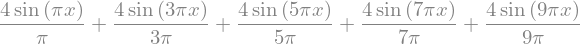

In [27]:
import sympy as sym
sym.init_printing()
from IPython.display import display_latex

x,n = sym.symbols('x, n')

f = sym.Piecewise((1, (x>0)), (-1, (x<=0)))

approx_fourier(f, 1, 10)

The [`lamdify` function from SymPy](https://docs.sympy.org/dev/modules/utilities/lambdify.html#sympy.utilities.lambdify.lambdify) can be used to convert a SymPy expression to a function that can be used with NumPy. Here, we use it on the Fourier series for $f$ with just one term:

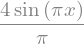

In [28]:
approx_fourier(f, 1, 1)

In [29]:
f_1 = sym.lambdify(x, approx_fourier(f, 1, 1), 'numpy')

In [30]:
f_1(0.5)

<span class="label label-danger">Task</span>
Does this value for `f_1(0.5)` make sense? What should a plot of the function `f_1` look like?

In particular, we can now evaluate `f_1` at an array of different points:

In [31]:
# Standard setup
import numpy as np

In [32]:
# Your code here

### BEGIN SOLUTION
xs = np.arange(0, 1, 0.1)
f_1(xs)
### END SOLUTION

array([0.        , 0.39345266, 0.74839143, 1.03007243, 1.21092277,
       1.27323954, 1.21092277, 1.03007243, 0.74839143, 0.39345266])

This lets us produce an array of values that can be plotted:

In [33]:
# Standard setup 
import matplotlib.pyplot as plt

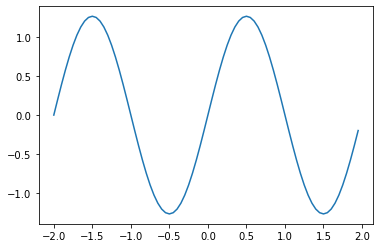

In [34]:
# Your code here 

### BEGIN SOLUTION
# del x # clear variable x if you have already used it
fig, ax = plt.subplots()

x_vals = np.arange(-2, 2, 0.05)
line, = ax.plot(x_vals, f_1(x_vals))
### END SOLUTION

### Animating

Now we are ready to use the `matplotlib.animation` functionality to animate this plot.

We write an `animate` function which updates the plot for a given frame number. Then we use the `FuncAnimation` function to produce an animation from those -- here, we ask for frames numbered 1 to 50, and each frame will be shown for 25 milliseconds.

In [35]:
import matplotlib.animation as animation

def animate(i):
    f_i = sym.lambdify(x, approx_fourier(f, 2, i), 'numpy')
    line.set_ydata(f_i(x_vals))  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=100, interval=25)

plt.show()

The following code **will take several seconds to run**, since this is when each frame is actually produced. The resulting animation is shown as an interactive applet -- you can use the controls underneath to pause the animation and to step through the frames manually.

In [36]:
# The code in this hidden cell will prevent the autograder having to produce the animations
### BEGIN HIDDEN TESTS
suppress_animation = False
if suppress_animation:
    animation.Animation.to_jshtml = lambda x : "[Animation omitted]"
    animation.Animation.to_html5_video = lambda x : "[Animation omitted]"
### END HIDDEN TESTS

In [37]:
from IPython.display import HTML
HTML(ani.to_jshtml())

<span class="label label-danger">Task</span>
Explore what the controls do. Do you notice that there is only a change in the plot in every 2nd frame? Why is that?

In [38]:
# The -/+ buttons can be used to alter the speed of the animation. |< and >| move one frame back/forward.

# There is only a change in every second frame because ...

### BEGIN SOLUTION
# There is only a change in every second frame because the Fourier series has b_n=0 for even n (and a_n=0 always)
### END SOLUTION

It is also possible to have `matplotlib` produce a video file showing the animation (again, **this will take a few seconds to run!**):

In [46]:
HTML(ani.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

The following code brings all of the plotting code together, and makes some tweaks:

* adding a plot of the original function. 
* adding a text annotation showing the number of terms in the Fourier series.
* using "blitting" to make the animation more efficient (in practice, this just means we need to define a function `init()` which produces a blank frame; you can read more about blitting [in the documentation](https://matplotlib.org/3.1.1/api/animation_api.html#funcanimation)).
* slowing down the animation, with `interval=45`.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x,n = sym.symbols('x, n')
x_vals = np.arange(-2, 2, 0.01)
line, = ax.plot(x_vals, f_1(x_vals))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.close() # this prevents the first frame being displayed as a static plot

# add an annotation showing the number of terms (this will be updated in each frame)
txt = ax.text(-2, -1, 'terms: 1')

# add a plot of the original function
x_vals_for_f = np.arange(-1, 1, 0.01)
f_num = sym.lambdify(x, f, 'numpy')
ax.plot(x_vals_for_f, f_num(x_vals_for_f))

# define the background of each frame - a "blank slate"
def init():
    line.set_ydata([np.nan] * len(x_vals))
    return line,

def animate(i):
    f_i = sym.lambdify(x, approx_fourier(f, 1, i), 'numpy')
    line.set_ydata(f_i(x_vals))  # update the data.
    txt.set_text('terms: '+str(i)) # update the annotation
    return line, txt  # return all the updated elements

ani = animation.FuncAnimation(
    fig, animate, frames=np.arange(1,50), init_func=init, interval=45, blit=True)

In [41]:
# The code in this hidden cell will prevent the autograder having to produce the animations
### BEGIN HIDDEN TESTS
if suppress_animation:
    animation.Animation.to_jshtml = lambda x : "[Animation omitted]"
    animation.Animation.to_html5_video = lambda x : "[Animation omitted]"
### END HIDDEN TESTS

In [49]:
from IPython.display import HTML
HTML(ani.to_jshtml())

<div class="alert alert-info">
    <h3>Exercise 2.1</h3>

Produce a similar animation showing the convergence of the Fourier series for
$$f(x)=\begin{cases}x^2-x^3 & 0\leq x<1, \\ -x^2+x^3 & -1\leq x < 0,\end{cases}$$
defined on $[-1,1)$ and extended to be periodic.
</div>

_Note:_ The example above has 50 frames - you'll likely find that's far too many for this problem, as it will be very slow to run the code. Try doing it with 10 frames, which at least gives the idea of what's going on.

In [42]:
# Standard setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Use the name f for the function definition

### BEGIN SOLUTION

f = sym.Piecewise((x**2-x**3, (x>0)), (-x**2+x**3, (x<=0)))

fig, ax = plt.subplots()

x_vals = np.arange(-2, 2, 0.01)
f_1 = sym.lambdify(x, approx_fourier(f, 1, 1), 'numpy')
line, = ax.plot(x_vals, f_1(x_vals))
plt.close() # this prevents the first frame being displayed as a static plot

# add an annotation showing the number of terms (this will be updated in each frame)
txt = ax.text(-2, -1, 'terms: 1')

# add a plot of the original function
x_vals_for_f = np.arange(-1, 1, 0.01)
f_num = sym.lambdify(x, f, 'numpy')
ax.plot(x_vals_for_f, f_num(x_vals_for_f))

# define the background of each frame - a "blank slate"
def init():
    line.set_ydata([np.nan] * len(x_vals))
    return line,

def animate(i):
    f_i = sym.lambdify(x, approx_fourier(f, 1, i), 'numpy')
    line.set_ydata(f_i(x_vals))  # update the data.
    txt.set_text('terms: '+str(i)) # update the annotation
    return line, txt  # return all the updated elements

ani = animation.FuncAnimation(
    fig, animate, frames=np.arange(1,10), init_func=init, interval=50, blit=True)

### END SOLUTION

In [43]:
# Autograder Test: definition of f (1 mark)

assert isinstance(f, sym.Piecewise)
print(" ✔ f definition is of the correct type")
# Hidden tests  (1 mark)
### BEGIN HIDDEN TESTS
assert [f.subs(x,xi/4) for xi in range(-4,4,1)] == [-2.0, -0.984375, -0.375, -0.078125, 0, 0.046875, 0.125, 0.140625]
print(" ✔ f takes correct values")

if suppress_animation:
    animation.Animation.to_jshtml = lambda x : "[Animation omitted]"
    animation.Animation.to_html5_video = lambda x : "[Animation omitted]"
### END HIDDEN TESTS

 ✔ f definition is of the correct type
 ✔ f takes correct values


In [ ]:
# Use this cell to display your animated plot
from IPython.display import HTML
HTML(ani.to_jshtml())

## 3. Solving PDEs

Recall from Boyce & DiPrima (p504 in the ebook) that the solution of the wave equation $a^2u_{xx}=u_{tt}$ describing the motion of a string of length $L$ with fixed ends given by the boundary conditions $$u(0,t)=0, \quad u(L,t)=0$$ and nonzero initial displacement given by $$u(x,0)=f(x), \quad u_t(x,0)=0$$ is given by

$$u(x,t)=\sum_{n=1}^\infty c_nu_n(x,t)=\sum_{n=1}^\infty c_n\sin\frac{n\pi x}{L}\cos\frac{n\pi at}{L}$$

where

$$c_n=\frac{2}{L}\int_{0}^{L}f(x)\sin\frac{n\pi x}{L}\,dx$$

Again, we can use SymPy to do some of these calculations. We can also use our new animation skills to show the solution evolving over time.

---
**Example**

Problem 2 from section 10.7 of Boyce & DiPrima: 
an elastic string of length $L=20$ and with $a=1$ has fixed ends. It is set in motion with no initial velocity from the position $$u(x,0)=f(x)=\begin{cases}2x/L & 0\leq x \leq L/2 \\ 2(L-x)/L & L/2<x\leq L\end{cases}$$

---

First we set up the given parameters and initial conditions, then compute the coefficients $c_n$:

In [44]:
L = 20
a = 1
f = sym.Piecewise((2*x/L, (x<=L/2)), (2*(L-x)/L, (x>L/2)))

cn = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))

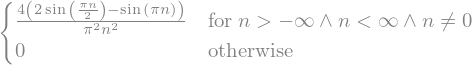

In [45]:
cn.simplify()

Now, the overall solution for $u(x,t)$ is approximated by taking just the first 10 terms of the sum:

In [ ]:
t = sym.symbols('t')
u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,10))

In [ ]:
u_symbolic.doit()

We are ready to animate now, using the method from the previous section. To get a bit more detail in the animation, we introduce the idea of having multiple frames per second.

<span class="label label-danger">Task</span>
In the following code, find all the instances of `fps` and make sure you understand why they are there.

In [ ]:
fps = 10 # number of frames per second

fig, ax = plt.subplots()

x_vals = np.linspace(0,L,200)

u = sym.lambdify([x, t], u_symbolic, modules='numpy')

# set up the initial frame
line, = ax.plot(x_vals, u(x_vals,0), 'k-')
plt.plot(x_vals,u(x_vals,0),'r:')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1,1)
plt.close()

# add an annotation showing the time (this will be updated in each frame)
txt = ax.text(0, 0.9, 't=0')

def init():
    line.set_ydata(u(x_vals,0))
    return line,

def animate(i):
    line.set_ydata(u(x_vals,i/fps))  # update the data
    txt.set_text('t='+str(i/fps)) # update the annotation
    return line, txt


ani = animation.FuncAnimation(fig, animate, np.arange(1, fps*10), init_func=init,
                              interval=10, blit=True, repeat=False)

In [ ]:
# The code in this hidden cell will prevent the autograder having to produce the animations
### BEGIN HIDDEN TESTS
if suppress_animation:
    animation.Animation.to_jshtml = lambda x : "[Animation omitted]"
    animation.Animation.to_html5_video = lambda x : "[Animation omitted]"
### END HIDDEN TESTS

In [ ]:
HTML(ani.to_jshtml())

<span class="label label-danger">Task</span>
The problem in Boyce & DiPrima asks for the animation to run from $t=0$ to $t=40$ - update the code to make it do that, and write a few sentences describing the motion of the string.

<div class="alert alert-info">
    <h3>Exercise 3.1</h3>

Apply a similar method to problems 1 and 3 from Boyce & DiPrima section 10.7, which have the same setup but different initial conditions:

**(a)** $f(x)=\begin{cases}4x/L & 0\leq x \leq L/4 \\ 1 & L/4< x<3L/4 \\ 4(L-x)/L & 3L/4\leq x\leq L\end{cases}$

**(b)** $f(x)=8x(L-x)^2/L^3$
    
</div>

In [ ]:
# Your code here for (a)

### BEGIN SOLUTION

L = 20
a = 1
f = sym.Piecewise((4*x/L, (x<=L/4)), (1, (x<=3*L/4)), (4*(L-x)/L, (x>3*L/4)))

cn = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))
t = sym.symbols('t')
u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,10))

fps = 10 # number of frames per second

fig, ax = plt.subplots()

x_vals = np.linspace(0,L,200)

u = sym.lambdify([x, t], u_symbolic, modules='numpy')

# set up the initial frame
line, = ax.plot(x_vals, u(x_vals,0), 'k-')
plt.plot(x_vals,u(x_vals,0),'r:')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.2,1.2)
plt.close()

# add an annotation showing the time (this will be updated in each frame)
txt = ax.text(0, 0.9, 't=0')

def init():
    line.set_ydata(u(x_vals,0))
    return line,

def animate(i):
    line.set_ydata(u(x_vals,i/fps))  # update the data
    txt.set_text('t='+str(i/fps)) # update the annotation
    return line, txt


ani = animation.FuncAnimation(fig, animate, np.arange(1, fps*40), init_func=init,
                              interval=10, blit=True, repeat=False)

### END SOLUTION

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
# Your code here for (b) 

### BEGIN SOLUTION

L = 20
a = 1
f = 8*x*(L-x)**2/L**3

cn = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))
t = sym.symbols('t')
u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,10))

fps = 10 # number of frames per second

fig, ax = plt.subplots()

x_vals = np.linspace(0,L,200)

u = sym.lambdify([x, t], u_symbolic, modules='numpy')

# set up the initial frame
line, = ax.plot(x_vals, u(x_vals,0), 'k-')
plt.plot(x_vals,u(x_vals,0),'r:')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.2,1.2)
plt.close()

# add an annotation showing the time (this will be updated in each frame)
txt = ax.text(0, 0.9, 't=0')

def init():
    line.set_ydata(u(x_vals,0))
    return line,

def animate(i):
    line.set_ydata(u(x_vals,i/fps))  # update the data
    txt.set_text('t='+str(i/fps)) # update the annotation
    return line, txt


ani = animation.FuncAnimation(fig, animate, np.arange(1, fps*40), init_func=init,
                              interval=10, blit=True, repeat=False)

### END SOLUTION

In [ ]:
HTML(ani.to_jshtml())